In [1]:
# import libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/nickkas/python_ml_ect_/master/diabetes.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


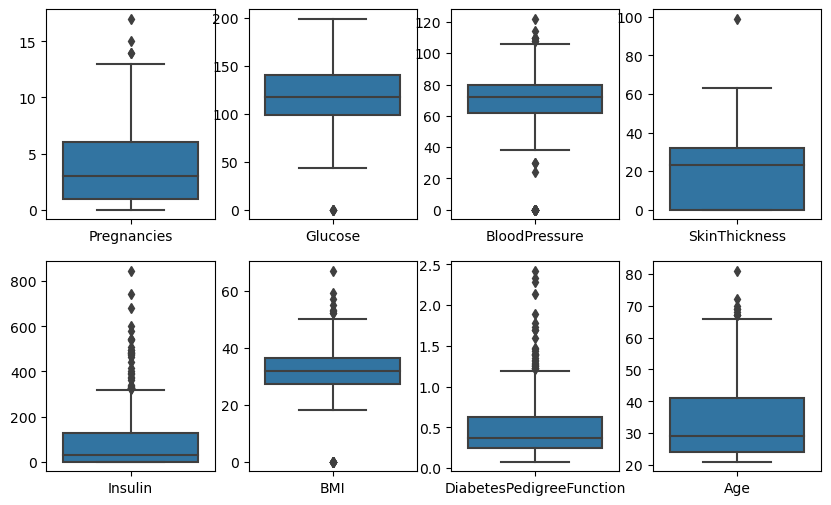

<Axes: >

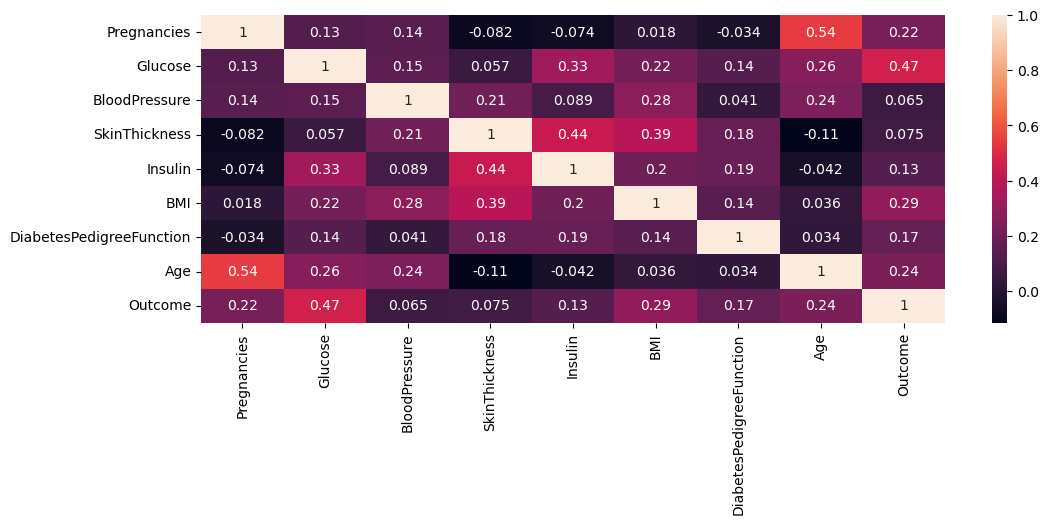

In [2]:
# info about the dataset and then descriptive stats using matplotlib and seaborn

df.info()
df.isna().sum()
df.nunique()
df.dtypes





def desc_plots(df):
    plt_,axs = plt.subplots(2,4,figsize=(10,6))
    sns.boxplot(df[['Pregnancies']],ax=axs[0,0])
    sns.boxplot(df[['Glucose']],ax=axs[0,1])
    sns.boxplot(df[['BloodPressure']],ax=axs[0,2])
    sns.boxplot(df[['SkinThickness']],ax=axs[0,3])
    sns.boxplot(df[['Insulin']],ax=axs[1,0])
    sns.boxplot(df[['BMI']],ax=axs[1,1])
    sns.boxplot(df[['DiabetesPedigreeFunction']],ax=axs[1,2])
    sns.boxplot(df[['Age']],ax=axs[1,3])
    plt.show()



desc_plots(df)


plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

In [3]:
# statsmodels is used to show the statiscal significance between feautres and the coefficients of the said features

import statsmodels.api as sm

y_endog = df['Outcome']
X_exog = sm.add_constant(df.drop('Outcome', axis=1))

full_model = sm.GLM(y_endog,X_exog,family=sm.families.Binomial()).fit()
print(full_model.summary())


coefficients = pd.DataFrame({'Feature': X_exog.columns,'Coefficient': full_model.params.values})
print(coefficients)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      759
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -361.72
Date:                Sat, 16 Dec 2023   Deviance:                       723.45
Time:                        14:34:10   Pearson chi2:                     836.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2964
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [4]:
# Now, preprocessing, data cleaning, model selection, testing, ect..


X = df.drop('Outcome',axis=1)
y = df[['Outcome']]

y.value_counts(normalize=True)



from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit_transform(X)




from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


clf = LogisticRegression().fit(X,y)
clf_pred = clf.predict(X)
clf_pred_prob = clf.predict_proba(X)[::,1]

rfc = RandomForestClassifier().fit(X,y)
rfc_pred = rfc.predict(X)
rfc_pred_prob = rfc.predict_proba(X)[::,1]

Knn = KNeighborsClassifier(n_neighbors=6).fit(X,y)
Knn_pred = Knn.predict(X)
Knn_pred_prob = Knn.predict_proba(X)[::,1]

nb = GaussianNB().fit(X,y)
nb_pred = nb.predict(X)
nb_pred_prob = nb.predict_proba(X)[::,1]

gb = GradientBoostingClassifier().fit(X,y)
gb_pred = gb.predict(X)
gb_pred_prob = gb.predict_proba(X)[::,1]


from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# Logistic Regression Results
clf_acc = accuracy_score(y, clf_pred)
print('Accuracy of Logistic Regression Model',clf_acc*100)

clf_roc = roc_auc_score(y, clf_pred_prob)
print('logistic Regression ROC: ',clf_roc*100)

#Logistic Regression Model produces a higher roc with 10 fold cross-validation
cv_clf = cross_val_score(clf, X,y,cv=10,scoring='roc_auc').max()
print('Logistic Regression ROC with Cross-Validation',cv_clf*100)


#Random Forest Classification Results

acc_rfc = accuracy_score(y,rfc_pred)
print('accuracy score Random Forest Classification',acc_rfc*100)

roc_rfc = roc_auc_score(y,rfc_pred_prob)
print('roc using Random Forest Classification= ',roc_rfc)

# KNN Classification Results

acc_knn = accuracy_score(y, Knn_pred)
print('accuarcy score using knn= ',acc_knn*100)

roc_knn = roc_auc_score(y, Knn_pred_prob)
print('roc using knn',roc_auc_score(y, Knn_pred_prob)*100)

# Results from Naive Bayes Classification

acc_nb = accuracy_score(y, nb_pred)
print(f'the Accuracy of the Naive Bayes Classifier: {acc_nb}')

roc_nb = roc_auc_score(y,nb_pred_prob)
print(f'the roc/auc score from the Naive Bayes Classifier: {roc_nb}')

acc_gb = accuracy_score(y, gb_pred)
print(f'the accuracy using Gradient boost classifier: {acc_gb}')

roc_gb = roc_auc_score(y,gb_pred_prob)
print(f'the roc_auc score using Gradient Boost classifier: {roc_gb}')





Accuracy of Logistic Regression Model 78.25520833333334
logistic Regression ROC:  83.8813432835821
Logistic Regression ROC with Cross-Validation 91.77777777777779
accuracy score Random Forest Classification 100.0
roc using Random Forest Classification=  1.0
accuarcy score using knn=  78.25520833333334
roc using knn 86.1929104477612
the Accuracy of the Naive Bayes Classifier: 0.7630208333333334
the roc/auc score from the Naive Bayes Classifier: 0.8243507462686568
the accuracy using Gradient boost classifier: 0.90625
the roc_auc score using Gradient Boost classifier: 0.9715298507462687


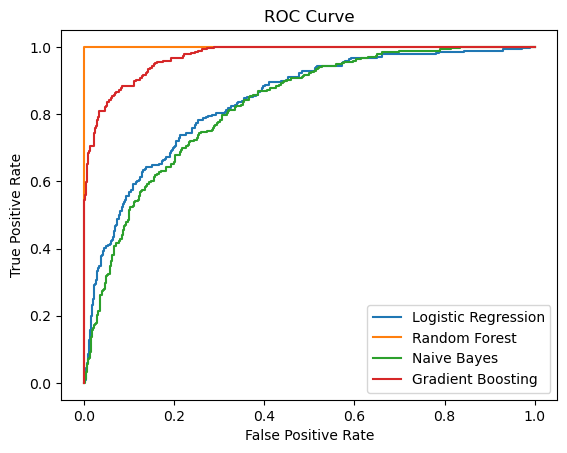

In [5]:
#All ROC Curves plotted together
def roc_curve_plot(y, y_pred_prob,model_name):
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    plt.plot(fpr,tpr,label=model_name)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    
    
roc_curve_plot(y,clf_pred_prob,'Logistic Regression')
roc_curve_plot(y,rfc_pred_prob,'Random Forest')
roc_curve_plot(y,nb_pred_prob,'Naive Bayes')
roc_curve_plot(y,gb_pred_prob,'Gradient Boosting')
plt.legend()
plt.show()